In [1]:
%autosave 0
from __future__ import absolute_import, division, print_function

Autosave disabled


# Filtering images

In [2]:
%pylab inline
import cv2
import scipy.ndimage
import skimage.util
import matplotlib.cm as cm

Populating the interactive namespace from numpy and matplotlib


## Loading, converting to grayscale and displaying the images

In [3]:
img = cv2.imread('grasshopper.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = scipy.ndimage.zoom(img, .25) # one fourth in each dimension
height, width = img.shape
print("grayscale image: {1}px x {0}px".format(height, width))

grayscale image: 325px x 325px


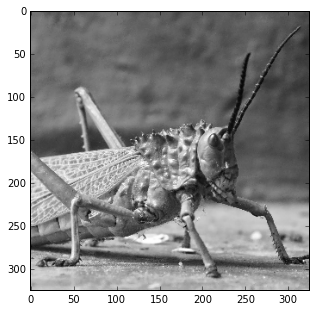

In [4]:
figure(figsize(5,5))
plt.imshow(img, 'gray');

## Adding different types of noise

In [5]:
noisy_img1 = skimage.util.random_noise(img, mode='gaussian', mean = 0.0, var=0.001) # conversion from uint8 to float64
noisy_img2 = skimage.util.random_noise(img, mode='s&p', amount=0.05)

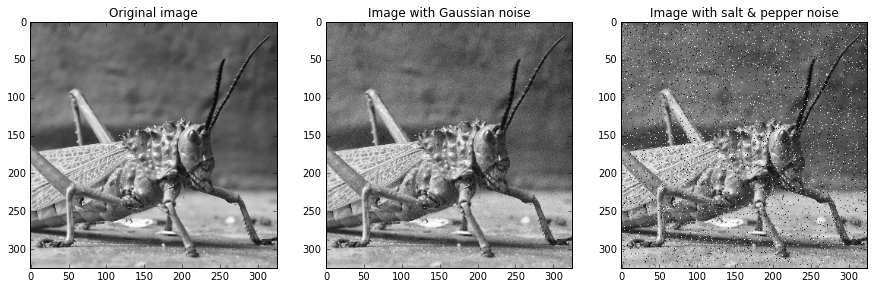

In [6]:
figure(figsize(15,5))
plt.subplot(1, 3, 1), plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2), plt.imshow(noisy_img1, 'gray')
plt.title('Image with Gaussian noise')
plt.subplot(1, 3, 3), plt.imshow(noisy_img2, 'gray')
plt.title('Image with salt & pepper noise');

## Smoothing operations

### Normalized box filter (simple averaging)

In [7]:
# create a normalized box filter
n = 3
h1 = np.ones((n, n), np.float32) / np.square(n)
# apply the filter
box1 = cv2.filter2D(noisy_img1, -1, h1)
box2 = cv2.filter2D(noisy_img2, -1, h1)

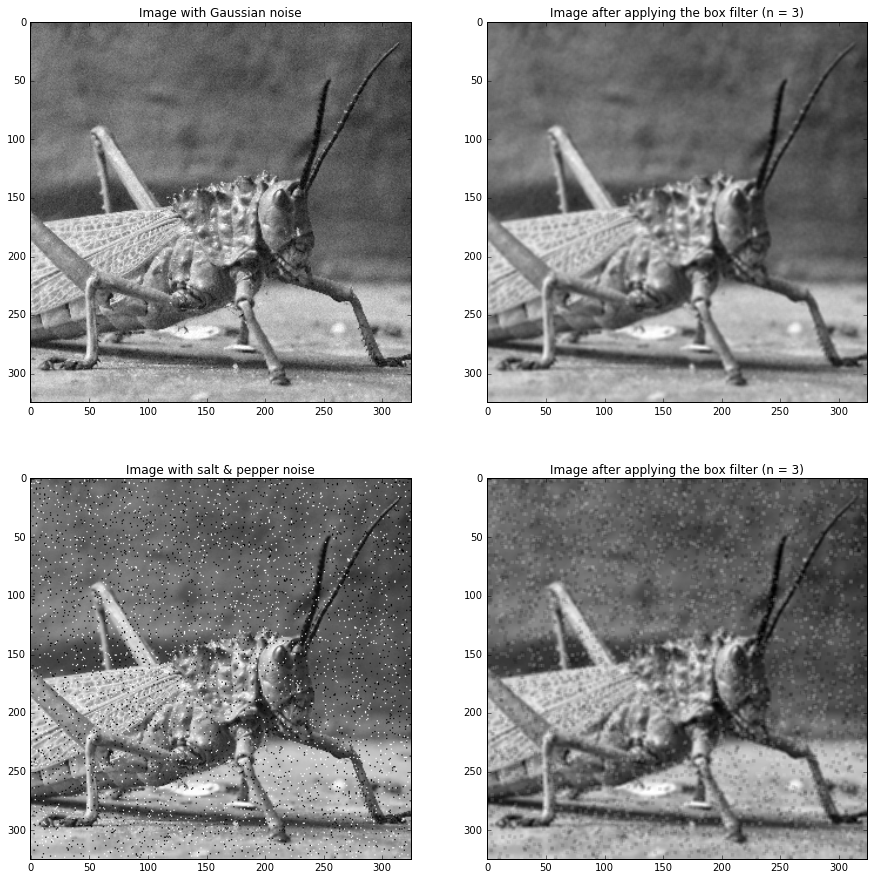

In [8]:
figure(figsize(15,15))
plt.subplot(2, 2, 1), plt.imshow(noisy_img1, 'gray')
plt.title('Image with Gaussian noise')
plt.subplot(2, 2, 2), plt.imshow(box1, 'gray')
plt.title('Image after applying the box filter (n = {0})'.format(n))
plt.subplot(2, 2, 3), plt.imshow(noisy_img2, 'gray')
plt.title('Image with salt & pepper noise')
plt.subplot(2, 2, 4), plt.imshow(box2, 'gray')
plt.title('Image after applying the box filter (n = {0})'.format(n));

### Gaussian filter

In [9]:
# 2-D Gaussian kernel
n = 11
sigma = 2
h2 = cv2.getGaussianKernel(n, sigma)
h2 = h2 * h2.transpose()
# apply the filter
gaussian1 = cv2.filter2D(noisy_img1, -1, h2)
gaussian2 = cv2.filter2D(noisy_img2, -1, h2)

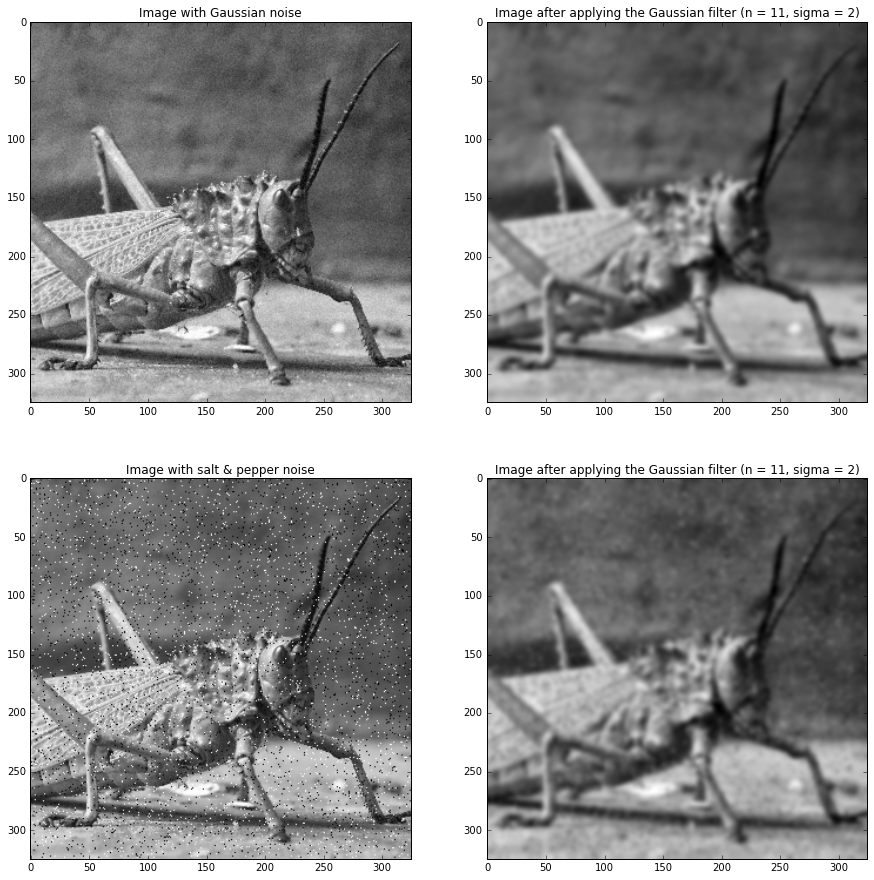

In [10]:
figure(figsize(15,15))
plt.subplot(2, 2, 1), plt.imshow(noisy_img1, 'gray')
plt.title('Image with Gaussian noise')
plt.subplot(2, 2, 2), plt.imshow(gaussian1, 'gray')
plt.title('Image after applying the Gaussian filter (n = {0}, sigma = {1})'.format(n, sigma))
plt.subplot(2, 2, 3), plt.imshow(noisy_img2, 'gray')
plt.title('Image with salt & pepper noise')
plt.subplot(2, 2, 4), plt.imshow(gaussian2, 'gray')
plt.title('Image after applying the Gaussian filter (n = {0}, sigma = {1})'.format(n, sigma));

Visualizing the Gaussian kernel:

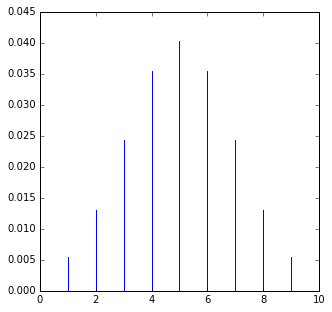

In [11]:
figure(figsize(5,5))
plt.stem(h2[int(n/2)], markerfmt = ' ');

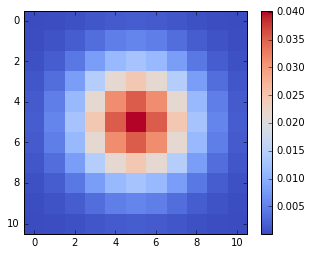

In [12]:
figure(figsize(5,4))
plt.imshow(h2, interpolation='nearest', cmap=cm.coolwarm)
plt.colorbar();

### Median filter

In [13]:
tmp = noisy_img1.flatten()
print("image in the range from {0} to {1}".format(min(tmp), max(tmp)))

image in the range from 0.0 to 1.0


In [14]:
# Median filter (requires uint8)
n = 5
median1 = cv2.medianBlur(np.uint8(noisy_img1 * 255), n)
median2 = cv2.medianBlur(np.uint8(noisy_img2 * 255), n)

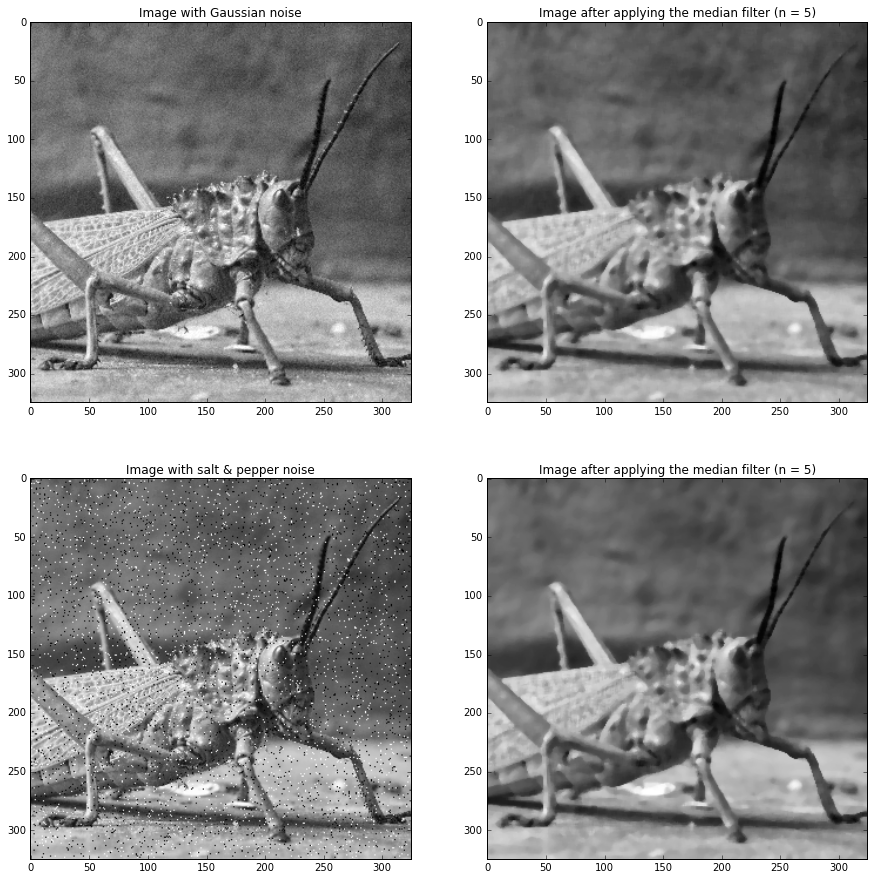

In [15]:
figure(figsize(15,15))
plt.subplot(2, 2, 1), plt.imshow(noisy_img1, 'gray')
plt.title('Image with Gaussian noise')
plt.subplot(2, 2, 2), plt.imshow(median1, 'gray')
plt.title('Image after applying the median filter (n = {0})'.format(n))
plt.subplot(2, 2, 3), plt.imshow(noisy_img2, 'gray')
plt.title('Image with salt & pepper noise')
plt.subplot(2, 2, 4), plt.imshow(median2, 'gray')
plt.title('Image after applying the median filter (n = {0})'.format(n));

### Alternatives:

#### Normalized box filter

In [16]:
n = 3
box3 = cv2.blur(noisy_img1, (n, n))
box4 = cv2.blur(noisy_img2, (n, n))

#### Visual inspection that the results are the same

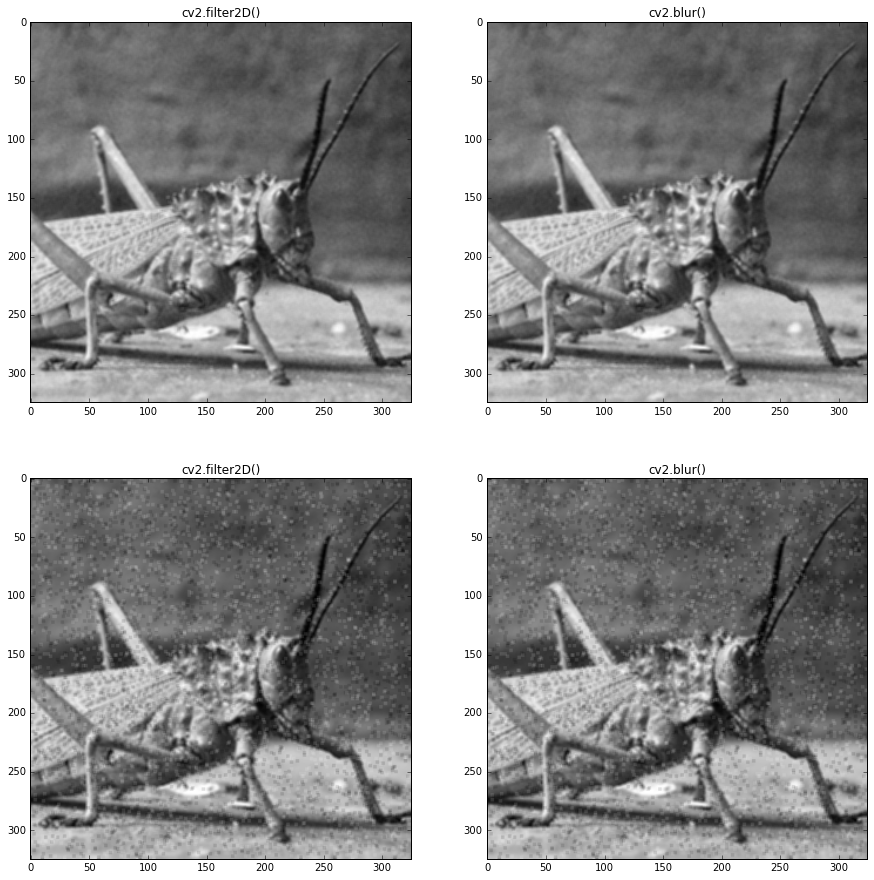

In [17]:
figure(figsize(15,15))
plt.subplot(2, 2, 1), plt.imshow(box1, 'gray')
plt.title('cv2.filter2D()')
plt.subplot(2, 2, 2), plt.imshow(box3, 'gray')
plt.title('cv2.blur()')
plt.subplot(2, 2, 3), plt.imshow(box2, 'gray')
plt.title('cv2.filter2D()')
plt.subplot(2, 2, 4), plt.imshow(box4, 'gray')
plt.title('cv2.blur()');

#### Gaussian filter

In [18]:
n, sigma = 11, 2
gaussian3 = cv2.GaussianBlur(noisy_img1, (n, n), sigma)
gaussian4 = cv2.GaussianBlur(noisy_img2, (n, n), sigma)

#### Visual inspection that both results are the same

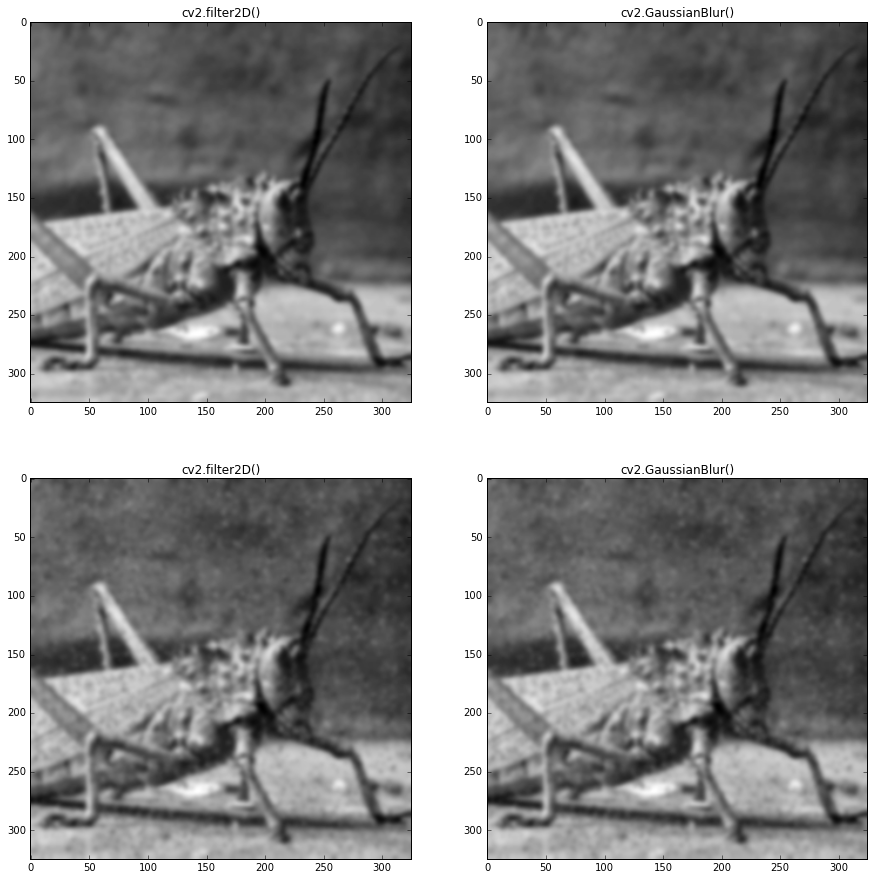

In [19]:
figure(figsize(15,15))
plt.subplot(2, 2, 1), plt.imshow(gaussian1, 'gray')
plt.title('cv2.filter2D()')
plt.subplot(2, 2, 2), plt.imshow(gaussian3, 'gray')
plt.title('cv2.GaussianBlur()')
plt.subplot(2, 2, 3), plt.imshow(gaussian2, 'gray')
plt.title('cv2.filter2D()')
plt.subplot(2, 2, 4), plt.imshow(gaussian4, 'gray')
plt.title('cv2.GaussianBlur()');

#### Computing the differences in the intensity values between both methods

In [20]:
diff = gaussian3 - gaussian1

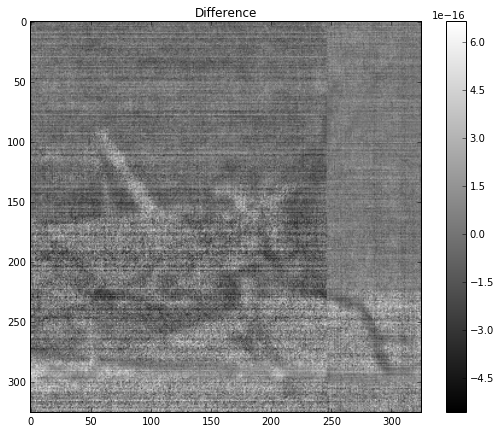

In [21]:
figure(figsize(9,7))
plt.imshow(diff, 'gray')
plt.title('Difference')
plt.colorbar();

In [22]:
min(diff.flatten()), max(diff.flatten())

(-5.5511151231257827e-16, 6.6613381477509392e-16)

## Sharpening

### Smooth the image and compute the difference between the original image and the smoothed one

In [23]:
theta = 20
img2 = cv2.imread('old_man.jpg', cv2.IMREAD_GRAYSCALE)
smoothed = cv2.GaussianBlur(img2, (9,9), 10.0)
diff1 = (1.0 * img2 - smoothed) # uint8 -> float
diff2 = np.where(np.abs(diff1) > theta, diff1, 0) # set small absolute differences to zero

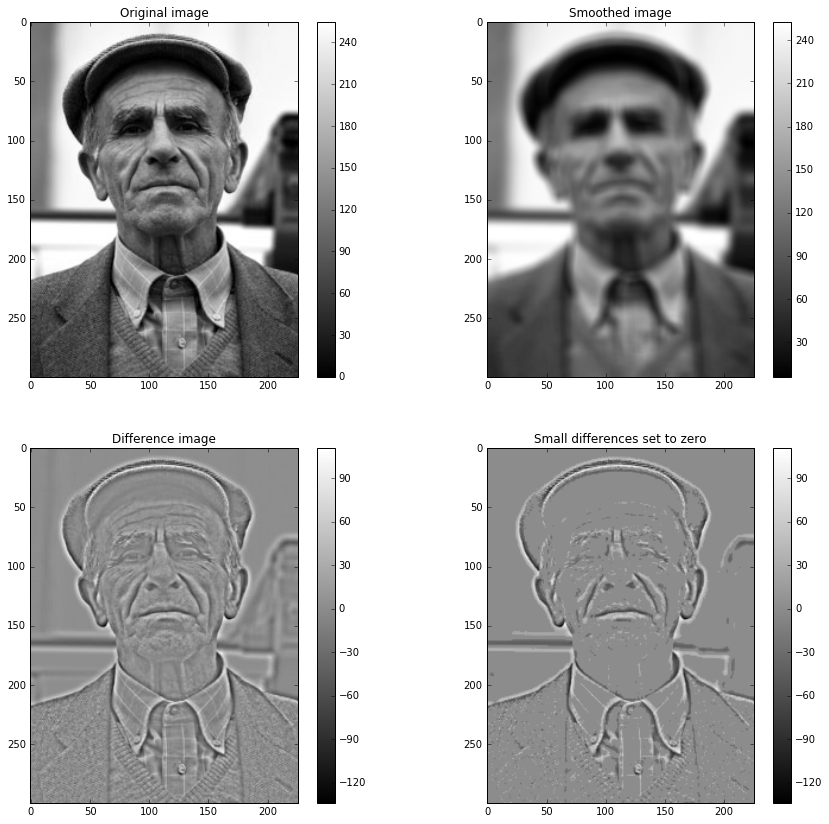

In [24]:
figure(figsize(15, 14))
plt.subplot(2, 2, 1), plt.imshow(img2, 'gray')
plt.title('Original image'), plt.colorbar()
plt.subplot(2, 2, 2), plt.imshow(smoothed, 'gray')
plt.title('Smoothed image'), plt.colorbar()
plt.subplot(2, 2, 3), plt.imshow(diff1, 'gray')
plt.title('Difference image'), plt.colorbar()
plt.subplot(2, 2, 4), plt.imshow(diff2, 'gray')
plt.title('Small differences set to zero'), plt.colorbar();

### Unsharp mask

In [25]:
mask = np.where(diff1 > theta, 255, 0)

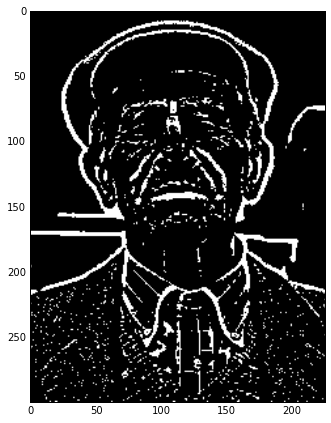

In [26]:
figure(figsize(7, 7))
plt.imshow(mask, 'gray');

### Sharpening

In [27]:
c = .3
sharpened = img2 + c * diff2
# clip the image to the range 0..255
sharpened = np.where(sharpened > 255, 255, sharpened)
sharpened = np.where(sharpened < 0, 0, sharpened)

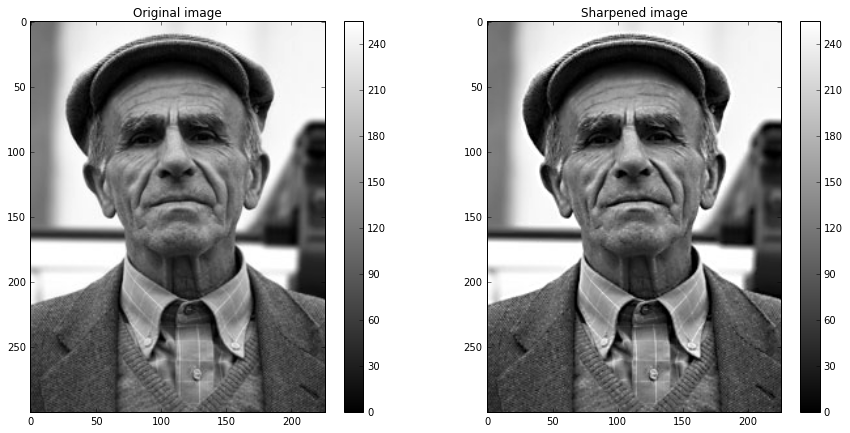

In [28]:
figure(figsize(15, 7))
plt.subplot(1, 2, 1), plt.imshow(img2, 'gray')
plt.title('Original image'), plt.colorbar()
plt.subplot(1, 2, 2), plt.imshow(sharpened, 'gray')
plt.title('Sharpened image'), plt.colorbar();